In [39]:
import yfinance as yf
data = yf.download(tickers='AAPL', period='20y', interval='1d')


[*********************100%%**********************]  1 of 1 completed


In [8]:
print(data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-09-03  17.610714  17.878571  17.405357  17.449286  15.228876  331928800
2013-09-04  17.841429  17.937143  17.724285  17.810356  15.544005  345032800
2013-09-05  17.866072  17.881430  17.629999  17.688213  15.437406  236367600
2013-09-06  17.801430  17.834999  17.498215  17.793571  15.529356  359525600
2013-09-09  18.035713  18.139999  17.981428  18.077499  15.777159  340687200


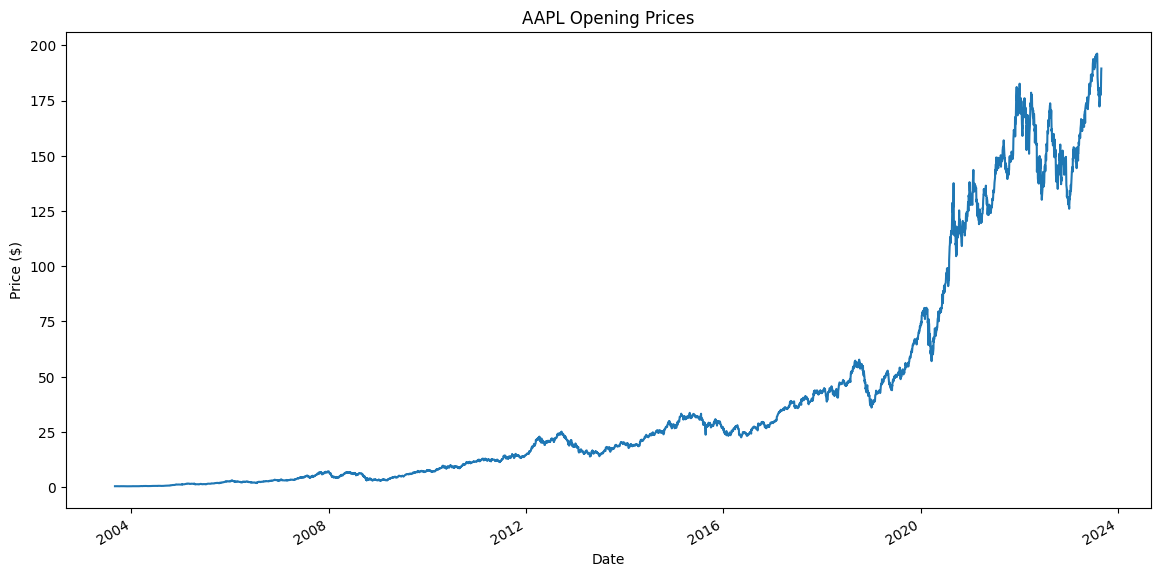

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
data['Open'].plot(title='AAPL Opening Prices')
plt.ylabel('Price ($)')
plt.show()


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the line of best fit
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

# Plot the data and the line of best fit
plt.figure(figsize=(14, 7))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, y_fit, '-', label='Line of Best Fit', color='red')
plt.title('Line of Best Fit')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


NameError: name 'x' is not defined

In [19]:
pip install numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
x = data.index  # or some other independent variable
y = data['Close']  # or another dependent variable from your data
x = [d.toordinal() for d in data.index]



/var/folders/85/dmkkflwj3mgg3m6t8z5nxpww0000gn/T/ipykernel_35933/1307275877.py:5: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, 10)


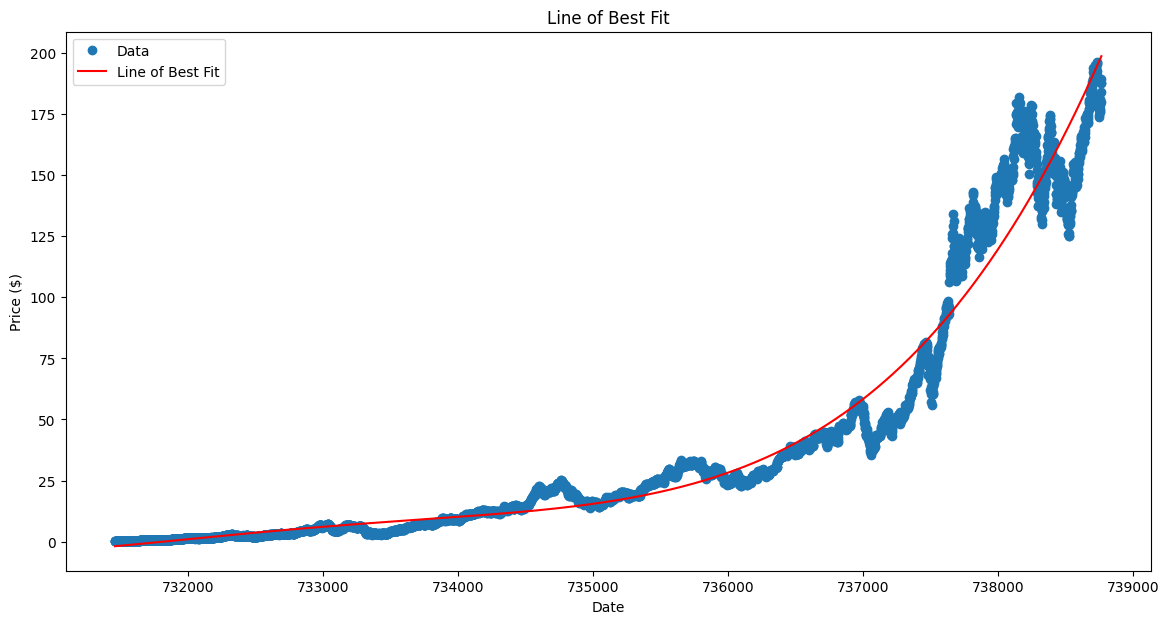

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the line of best fit
coefficients = np.polyfit(x, y, 10)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

# Plot the data and the line of best fit
plt.figure(figsize=(14, 7))
plt.plot(x, y, 'o', label='Data')
plt.plot(x, y_fit, '-', label='Line of Best Fit', color='red')
plt.title('Line of Best Fit')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [35]:
import pandas as pd

last_date = data.index[-1]
future_dates = pd.date_range(start=last_date, periods=31)[1:]  # Exclude the last known date


In [36]:
x_future = [d.toordinal() for d in future_dates]


In [37]:
y_future = polynomial(x_future)


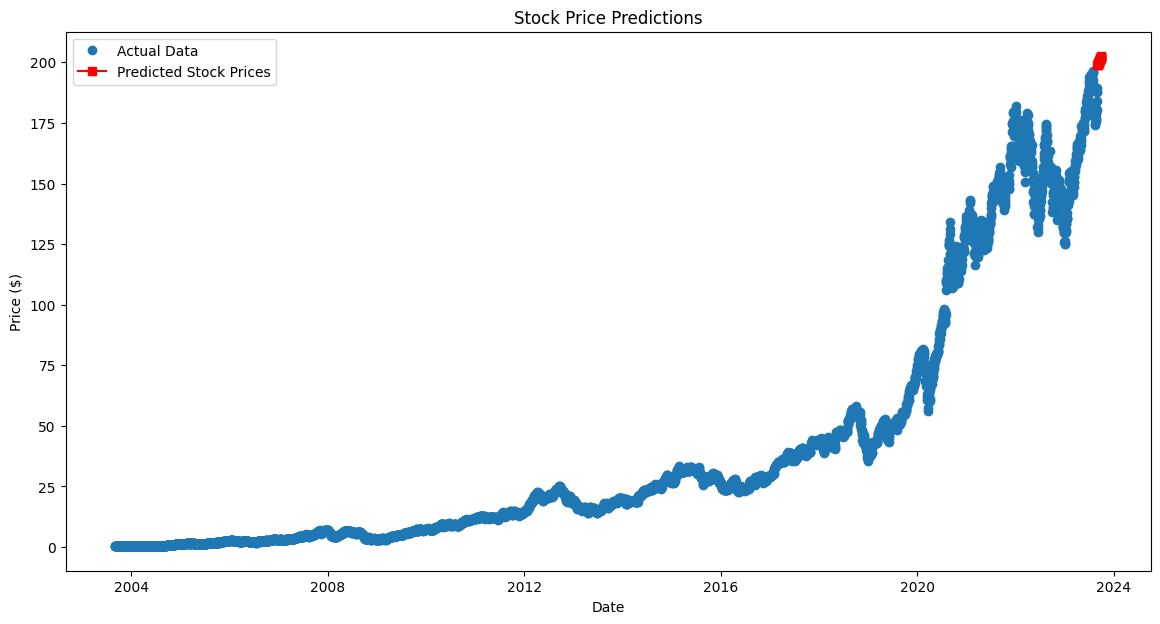

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, y, 'o', label='Actual Data')
plt.plot(future_dates, y_future, 's-', color='red', label='Predicted Stock Prices')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


In [41]:
print(future_dates)

DatetimeIndex(['2023-09-02', '2023-09-03', '2023-09-04', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
               '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-09-30', '2023-10-01'],
              dtype='datetime64[ns]', freq='D')


In [42]:
print(x_future, y_future)

[738765, 738766, 738767, 738768, 738769, 738770, 738771, 738772, 738773, 738774, 738775, 738776, 738777, 738778, 738779, 738780, 738781, 738782, 738783, 738784, 738785, 738786, 738787, 738788, 738789, 738790, 738791, 738792, 738793, 738794] [198.85498261 198.98117232 199.10742855 199.23374963 199.36013651
 199.486588   199.61310506 199.7396884  199.86633682 199.99304986
 200.11982846 200.24667311 200.37358284 200.50055861 200.62759948
 200.75470614 200.88187814 201.00911593 201.1364193  201.26378846
 201.39122415 201.5187242  201.64629054 201.7739222  201.90162039
 202.02938437 202.15721321 202.2851088  202.41306973 202.5410974 ]


In [44]:
import datetime

future_dates = [datetime.date.fromordinal(int(date)) for date in x_future]


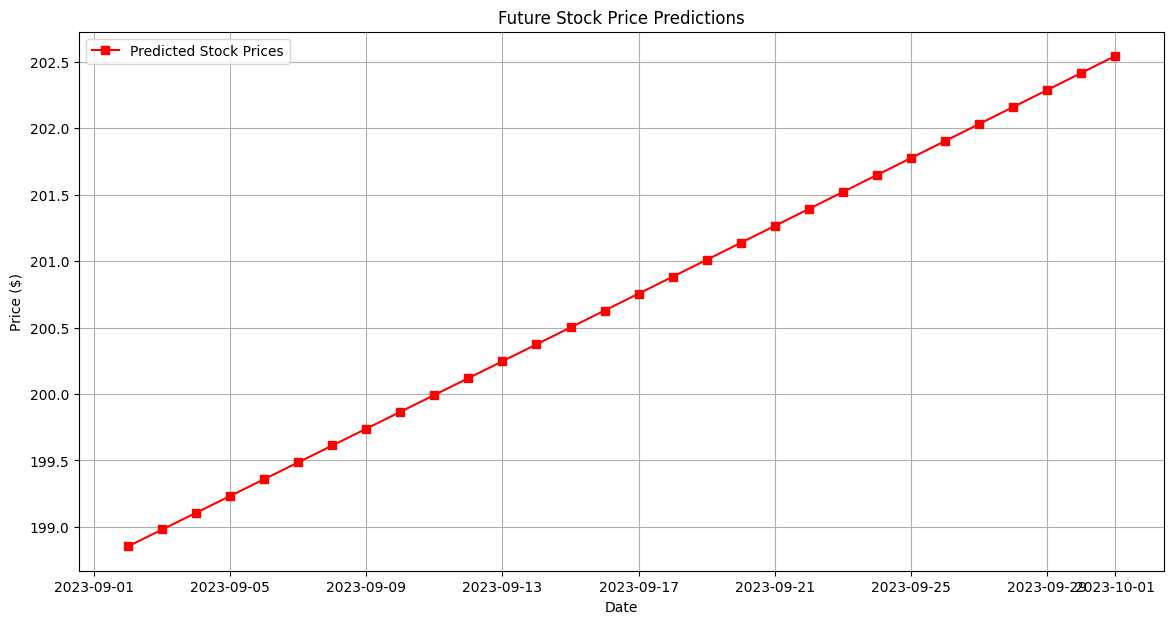

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plotting the predicted data
plt.plot(future_dates, y_future, 's-', color='red', label='Predicted Stock Prices')

plt.title('Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
import datetime

# 1. Convert today's date to its ordinal form
today_ordinal = datetime.date.today().toordinal()

# 2. Predict the stock price using the polynomial model
predicted_price_today = polynomial(today_ordinal)

print(f"The predicted stock price for today is: ${predicted_price_today:.2f}")


The predicted stock price for today is: $199.11
